In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
result = pd.read_csv("data/results.csv")
result.loc[(result["raceId"]==841)&(result["driverId"] ==20)]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
20776,20779,841,20,9,1,1,1,1,1,25.0,58,1:29:30.259,5370259,44,4,1:29.844,212.488,1


<ipython-input-17-b775203d31f0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lap2["time"]= lap2["time"].str.split(':')
<ipython-input-17-b775203d31f0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lap2["lap_minutes"] = " "
<ipython-input-17-b775203d31f0>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

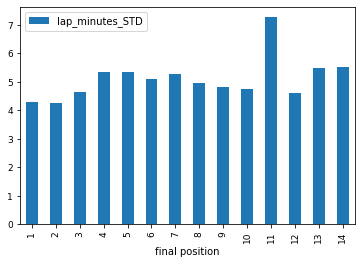

,raceId,driverId,final position,lap_minutes_STD
11,841,20,1,4.293405
0,841,1,2,4.264972
17,841,808,3,4.632051
3,841,4,4,5.332322
9,841,17,5,5.334411
10,841,18,6,5.108007
6,841,13,7,5.274966
14,841,67,8,4.972540
8,841,16,9,4.820189
19,841,814,10,4.751044


In [17]:
lap = pd.read_csv("data/lap_times.csv")
result.rename(columns = {'position':'final position'}, inplace = True)
result2 = result[["raceId", "driverId", "final position"]]
joined_table = lap.merge(result2, on = ["raceId", "driverId"], how = "left")
lap2 = joined_table.loc[(lap["raceId"]==841)]
lap2["time"]= lap2["time"].str.split(':')
lap2["lap_minutes"] = " "
min = []
for time_list in lap2["time"]:
    if time_list[0] == "1":
        minute = 60 + float(time_list[1])
        min.append(minute)
    elif time_list[0] == "2":
        minute = 120 + float(time_list[1])
        min.append(minute)
    elif time_list[0] == "3":
        minute = 180 + float(time_list[1])
        min.append(minute)
    elif time_list[0] == "4":
        minute = 240 + float(time_list[1])
        min.append(minute)
    elif time_list[0] == "11":
        minute = 660 + float(time_list[1])
        min.append(minute)
lap2["lap_minutes"] = min
lap3 = lap2.groupby(["raceId","driverId",'final position'], as_index=False)["lap_minutes"].std()
lap4 =lap3.loc[lap3['final position'] != '\\N']
lap4["final position"] = lap4["final position"].astype(int)
lap4.sort_values(by=['final position'], inplace=True)
lap4.rename(columns = {'lap_minutes':'lap_minutes_STD'}, inplace = True)
lap4.plot.bar(x='final position', y='lap_minutes_STD', fontsize='9')
plt.show()
lap4
    # .reset_index(name="lap_minutes_Std")

In [13]:
sprint= pd.read_csv("data/results.csv")
sprint.loc[(sprint["raceId"]==841)&(sprint["driverId"] ==20)]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
20776,20779,841,20,9,1,1,1,1,1,25.0,58,1:29:30.259,5370259,44,4,1:29.844,212.488,1
